# K-means Clustering: Twitter users analysis

# Este programa pretende agrupar a los usuarios de Tweeter de acuerdo a su personalidad por medio de la libreria K-means



## Lectura de datos
Como paso preliminar examinaremos el dataset que estaremos utilizando, el cual analiza la personalidad de los usuarios de la red social Twitter.

In [50]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


file_name = "analisis.csv"
data = pd.read_csv(file_name)
data.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [2]:
data.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

- Actor/actriz
- Cantante
- Modelo
- Tv,series
- Radio
- Tecnología
- Deportes
- Politica
- Escritor

 Para saber cuantos datos cuenta cada columna usaremos la siguiente linea 

In [3]:
print(data.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


# Visualizacion de datos 

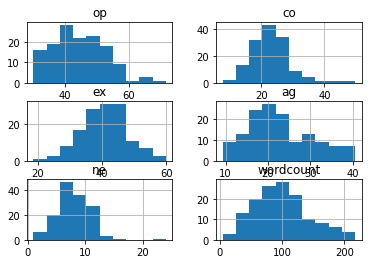

In [12]:
dd = data.drop(['categoria'], 1)
hist = dd.hist()
plt.show()

utilizaremos 3 dimensiones de las mostradas 

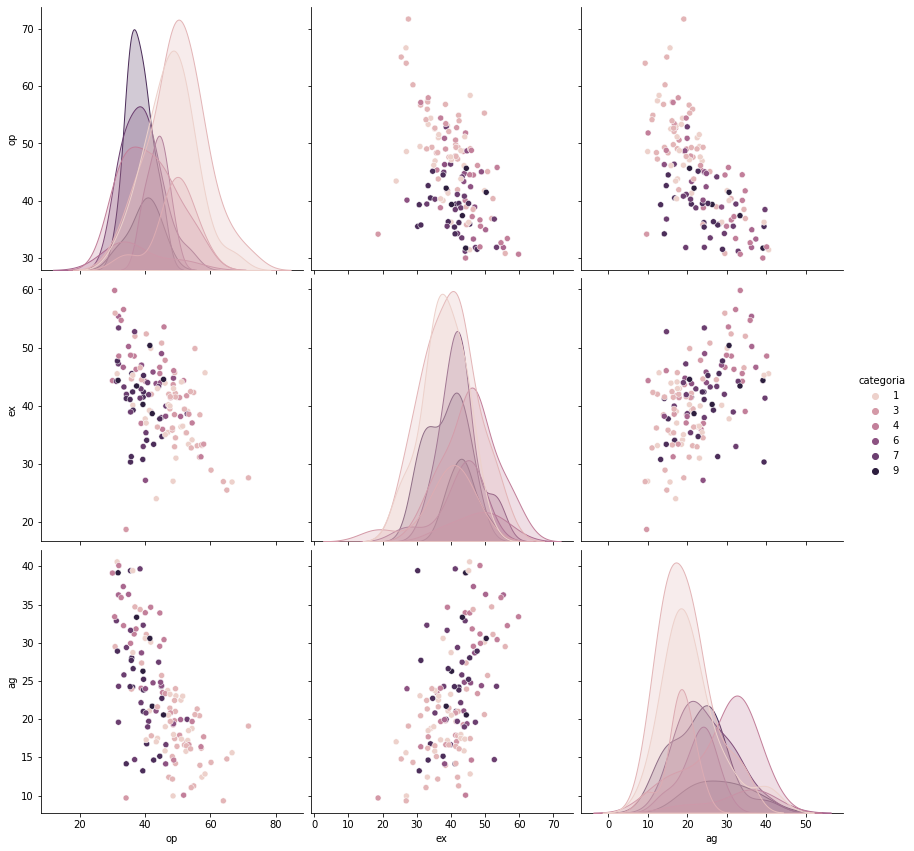

In [16]:
sb.pairplot(data.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')
plt.show()

In [18]:
X = np.array(data[["op","ex","ag"]])
y = np.array(data['categoria'])

print(f'Dimensiones: {X.shape}')

Dimensiones: (140, 3)


Para tener una mejor imagen crearemos una figura 3d

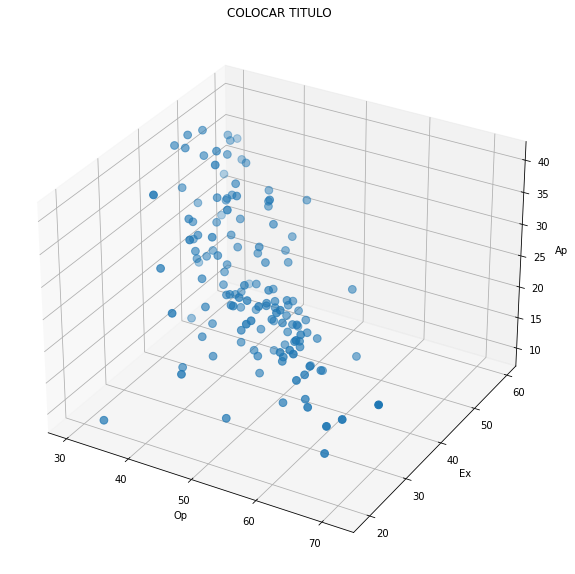

In [31]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]

for row in y:
    asignar.append(colores[row])
    
ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)

plt.title('COLOCAR TITULO')
plt.xlabel('Op')
plt.ylabel('Ex')
ax.set_zlabel('Ap')
plt.show()

Ahora trataremos de recrear dicha imagen pero con "clusters" diferenciados, esto con la ayuda de K-means

Primero buscaremos el valor de K

## Parte 1: Programación Manual

### Función K-means

In [53]:
def k_means_fn(qty, m, n, K, X, centroids, elbow=False):
# qty = Número de iteraciones
# m = Cantidad de datos 
# n = Número de características
# K = Número de agrupamientos
# X = Vector de datos de tamaño (mxn)
# centroids = Vector en el que se guardarán los centroides calculados, es necesario brindarle unos 
#             valores aleatorios al prinicipio

# Los valores que retorna son:
# y = un arreglo de "K" arreglos con los puntos ya agrupados, cuyos índices van de 1 a K
# centroids = El vector de centroides con los resultados finales de los cluesters

    
    for i in range(qty):
        euclidian = np.array([]).reshape(m, 0) #Estructura para guardar la distancia euclidiana
        
        for k in range(K): 
            #Calculamos la distancia euclidiana entre los puntos y los centroides
            euclidian = np.c_[euclidian, np.sum((X - centroids[:, k])**2, axis=1)]
        
        cluster = np.argmin(euclidian, axis=1) + 1
        
        #Calculamos la media de los diferentes agrupamientos (clusters)
        y = {}
        for k in range(K):
            y[k+1] = np.array([]).reshape(n, 0)
        
        #Le asignamos los clusters a cada punto 
        for i in range(m):
            y[cluster[i]] = np.c_[y[cluster[i]], X[i]]
        
        for k in range(K):
            y[k+1] = y[k+1].T
        
        for k in range(K):
            centroids[:,k]=np.mean(y[k+1],axis=0)
    
    if elbow is False:
        
        if n == 2:
            #Graficando los puntos agrupados
            for k in range(K):
                plt.scatter(y[k+1][:,0], y[k+1][:,1])

            #Graficando los centroides
            plt.scatter(centroids[0,:], centroids[1,:], s=200,c='yellow')

        if n == 3:
            #Configuraciones previas para la graficación
            fig = plt.figure(figsize=(20,10))
            ax = fig.add_subplot(111, projection='3d')

            #Graficando los puntos agrupados
            for k in range(K):
                ax.scatter(y[k+1][:,0], y[k+1][:,1], y[k+1][:,2])

            #Graficando los centroides
            ax.scatter(centroids[0,:], centroids[1,:], centroids[2,:], s=300,c='yellow')
            
            return y, centroids, ax

    return y, centroids

### Función para hallar el mejor valor de K (Elbow method)

In [47]:
def elbow_method(X, K_min=1, K_max=10):
    m = np.shape(X)[0] # Número de datos
    n = np.shape(X)[1] # Número de Características
    
    cost = []
    
    for k in range (K_min, K_max+1):
        
        #Centroides aleatorios
        c = np.array([]).reshape(n, 0) 
        for i in range(k):
            c =np.c_[c, X[random.randint(0, m - 1)]]
        
        y, c = k_means_fn(50, m, n, k, X, c, True)
        
        aux = 0
        for i in range (k):
            if n == 2:
                aux += np.sum(((y[i+1][:,0] - c[0, i])**2 + (y[i+1][:,1] - c[1, i])**2))
            else:
                aux += np.sum(((y[i+1][:,0] - c[0, i])**2 + (y[i+1][:,1] - c[1, i])**2 + (y[i+1][:,2] - c[2, i])**2))
        
        #print(f'{k} : {aux}')
        
        cost.append(aux)
    
    return cost

In [51]:
#Hacemos un preprocesamiento de los datos que se compararán
m = np.shape(X)[0] # Número de datos
n = np.shape(X)[1] # Número de Características
K = 6 #Agrupamientos propuestos
it = 50 #Número de iteraciones

#Creamos la estructura para guardar los centroides e inicializamos aleatoriamente
c = np.array([]).reshape(n, 0) 

for k in range(K):
    c =np.c_[c, X[random.randint(0, m - 1)]]

print(f'Los centroides aleatorios son: \n{c}')

Los centroides aleatorios son: 
[[44.765313 46.955854 45.369773 48.587099 36.258913 45.669015]
 [43.954375 35.376179 35.925909 26.988702 45.225652 44.523106]
 [24.824609 23.747561 23.478258  9.948168 39.427283 20.548864]]


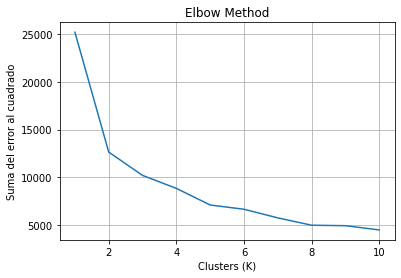

In [61]:
elbow = elbow_method(X, K_min=1, K_max=10)
t = range(1,11)
plt.plot(t, elbow)
plt.grid(True)
plt.title('Elbow Method')
plt.xlabel('Clusters (K)')
plt.ylabel('Suma del error al cuadrado')
plt.show()

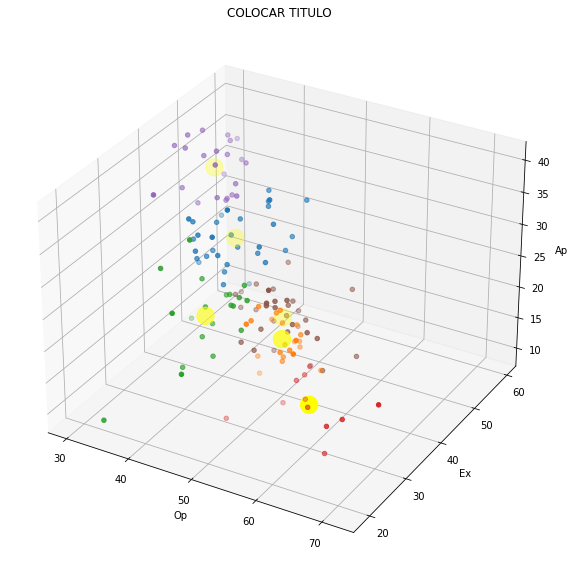

In [63]:
Y, c, ax = k_means_fn(it, m, n, K, X, c)


#Configuramos los parámetros de la gráfica
plt.title('COLOCAR TITULO')
plt.xlabel('Op')
plt.ylabel('Ex')
ax.set_zlabel('Ap')
plt.show()

## Parte 2: Usando librerías

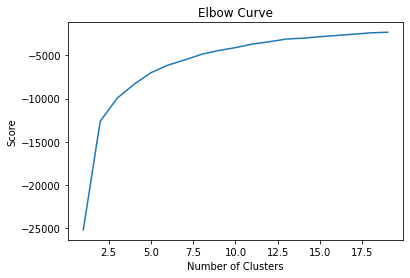

In [25]:
rango = range(1, 20)
k_means = [KMeans(n_clusters=i) for i in rango]

score = [k_means[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(rango,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

como podemos observar se trara de una curva suave por lo que podriamos usar el valor de 5 

In [26]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.73275924 33.0308789  21.11743814]
 [35.90241306 47.56828232 33.58748762]
 [40.078931   43.71085067 23.16550307]
 [50.42588653 40.66723528 17.30892462]
 [58.70462307 30.53566167 15.72207033]]


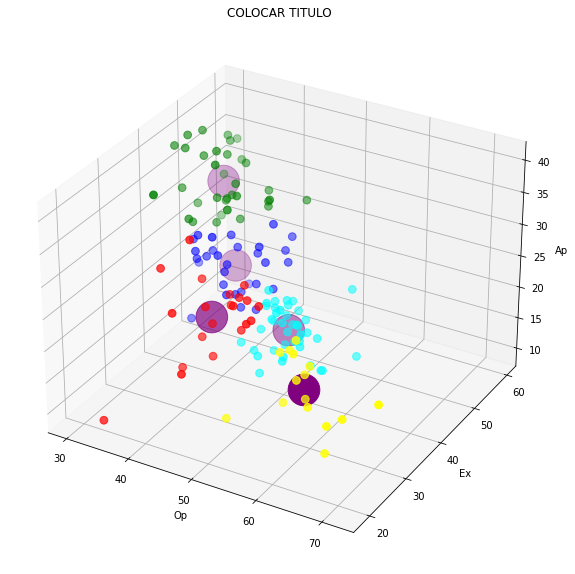

In [62]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='purple', s=1000)

plt.title('COLOCAR TITULO')
plt.xlabel('Op')
plt.ylabel('Ex')
ax.set_zlabel('Ap')
plt.show()

Con fin de poder desglozar lo obtenido se haran 3 graficas en 2d 

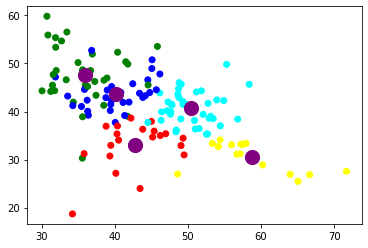

In [36]:

f1 = data['op'].values
f2 = data['ex'].values
 
plt.scatter(f1, f2, c=asignar)
plt.scatter(C[:, 0], C[:, 1], c='purple', s=200)
plt.show()

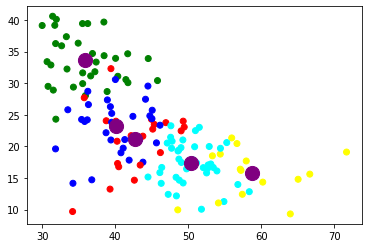

In [35]:
f1 = data['op'].values
f2 = data['ag'].values
 
plt.scatter(f1, f2, c=asignar)
plt.scatter(C[:, 0], C[:, 2], c='purple', s=200)
plt.show()

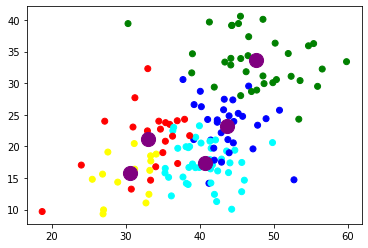

In [37]:
f1 = data['ex'].values
f2 = data['ag'].values
 
plt.scatter(f1, f2, c=asignar)
plt.scatter(C[:, 1], C[:, 2], c='purple', s=200)
plt.show()

Como podemos observar en las graficas los grupos se cuentran bien definidos, ahora veremos cuantos usuarios contiene cada cluster

In [38]:
copy =  pd.DataFrame()
copy['usuario'] = data['usuario'].values
copy['categoria'] = data['categoria'].values
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,21
1,green,34
2,blue,30
3,cyan,40
4,yellow,15


In [39]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,1.0


In [40]:
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

justinbieber 2 0
ladygaga 2 0
thelittleidiot 2 0


In [41]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  98,  64,  21,  82], dtype=int64)

In [43]:
users = data['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
maria_patino
ierrejon
carmenelectra
JudgeJudy


In [44]:
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

aguerosergiokun 7 0
andy_murray 7 0
Carrie_Br4dshaw 3 0
cesarmillan 4 0
Diane_Keaton 1 0
GwynethPaltrow 1 0
HerreraBeutler 8 0
HillaryClinton 8 0
hughlaurie 4 0
jiminhofe 8 0
jk_rowling 9 0
justinbieber 2 0
kobebryant 7 0
ladygaga 2 0
Rep_Hunter 8 0
SarahPalinUSA 8 0
SJP 1 0
SSantiagosegura 1 0
stevewoz 6 0
thelittleidiot 2 0
tomhanks 1 0


In [46]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
